# Simple MDP:

**Date:** May 14th 2023

**Author:** Lucas Jacobs

**Teacher:** Iman Mossavat

## Code

In [18]:
import numpy as np

#The specified environment
n_states = 5
end_point = n_states - 1
transition_probs = np.zeros((n_states, 2, n_states))
rewards = np.zeros((n_states, 2, n_states))
for s in range(n_states):
    for a in range(2):
        next_s = s + 2*a - 1  # 0 -> left, 1 -> right
        if next_s == end_point:
            rewards[s, a, next_s] = 1
        elif next_s < 0 or next_s >= n_states:
            rewards[s, a, s] = -1
        else:
            transition_probs[s, a, next_s] = 1
            rewards[s, a, next_s] = 0 #This can be changed to minus 2, so it get penalised when making a move.

# Perform GPI
gamma = 0.1
T = 100
v = np.random.randn(n_states)  # random initial values
pi = np.random.randint(2, size=(n_states,))  # random initial policy
for t in range(T):
    # Policy evaluation
    q = np.zeros((n_states, 2))
    for s in range(n_states):
        for a in range(2):
            #calculating the action value 'q' for each state action pair using the Bellman equation
            q[s, a] = rewards[s, a, end_point] + gamma * transition_probs[s, a, :].dot(v)
    v = np.max(q, axis=1)
    
    # Policy improvement (the greedy step in GPI)
    pi = np.argmax(q, axis=1)

# Check optimal policy
print("Optimal policy: ", pi)



Optimal policy:  [1 1 1 1 0]


The print of the variable 'pi', stores optimal policy. So this output means that it always needs to go right when being in state 0,1,2,3.
And when in 4, you are already there.

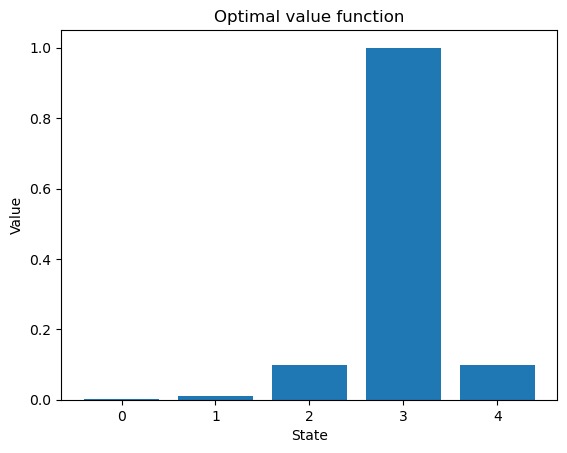

In [19]:
import matplotlib.pyplot as plt

# Plot of the value function
plt.bar(range(n_states), v)
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Optimal value function')
plt.show()

This bar plot show what the agents expected reward is under the optimal policy.
The reason that state 3 has a high value, can be explained by the environment.
Going right gives a reward of +1, and going left leads to minus 1. So the optimal policy is always going right.


## Does changing 𝛾 have any impact on the policy?

The answer to this question is no.
When changing gamma, it can affect the policy in certain cases or particular environments. 
But in this case, we only get a reward when you go fully left or right (1 or -1 score).
So, either way, when changing gamma, it will always lead to going right, because it will always be the optimal policy.
This is because it is a deterministic  environment, optimal policy will be decided by the rewards and the transistion between states.
Gamma is only to effect the the current and future rewards, so not for the optimal policy.

## Enviromnent (with slip)
For this environment, I found it hard to come up with an environment that can do all these functions described to translate it into code.
Therefore, I will describe what will probably happen when other functions are added like:
- slip downwards
- 4 moves: extra states which make the environment a lot bigger (up, down, left, right).

With the feature of slipping downwards, it will bring more randomness into the environment. This will lead to finding the optimal policy more exploratory. Furthermore, when moving it will cost, therefore this can lead to different optimal policies, This is due to that the agent wants to reach the goal and tries to minimize the cost of living.
Overall, will it depend on how high the probability is and the cost of living, and of course how the environment is structured. 

## References

- Generalized Policy Iteration(20-09-2018), medium. By Renu Khandelwal. https://arshren.medium.com/generalized-policy-iteration-c8e24e5c7971 
- Types of Environments(), Agents. https://www.doc.ic.ac.uk/project/examples/2005/163/g0516334/environ.html#:~:text=An%20environment%20is%20deterministic%20if,actions%20selected%20by%20the%20agents. 
 